Question 1

In [1]:
#Step 1: Import the necessary libraries
import numpy as np
import pandas as pd

In [5]:
#Step 2: Import the dataset from https://github.com/justmarkham
#Step 3: Assign it to a variable called users
users = pd.read_csv(r'C:\Users\rshnt\OneDrive\Desktop\BDAT\Data Programming\Assignments\Problem Set 3\user.csv', sep='|')
users.head(50)

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
5,6,42,M,executive,98101
6,7,57,M,administrator,91344
7,8,36,M,administrator,05201
8,9,29,M,student,01002
9,10,53,M,lawyer,90703


In [7]:
#Step 4: Discover what is the mean age per occupation
users[["age", "occupation"]].groupby("occupation").mean()

,age
occupation,
administrator,38.746835
artist,31.392857
doctor,43.571429
educator,42.010526
engineer,36.388060
entertainment,29.222222
executive,38.718750
healthcare,41.562500
homemaker,32.571429


In [9]:
#Step 5: Discover the Male ratio per occupation and sort it from the most to the least
def genderToNumber(x):
    if x=='M':
        return 1
    if x=='F':
        return 0
    
users['gender_count'] = users['gender'].apply(genderToNumber)
male_ratio = users.groupby('occupation').gender_count.sum() / users.occupation.value_counts()
male_ratio.sort_values(ascending = False)

doctor           1.000000
engineer         0.970149
technician       0.962963
retired          0.928571
programmer       0.909091
executive        0.906250
scientist        0.903226
entertainment    0.888889
lawyer           0.833333
salesman         0.750000
educator         0.726316
student          0.693878
other            0.657143
marketing        0.615385
writer           0.577778
none             0.555556
administrator    0.544304
artist           0.535714
librarian        0.431373
healthcare       0.312500
homemaker        0.142857
dtype: float64

In [10]:
#Step 6: For each occupation, calculate the minimum and maximum ages
users.groupby('occupation').age.agg(['min','max'])

,min,max
occupation,,
administrator,21,70
artist,19,48
doctor,28,64
educator,23,63
engineer,22,70
entertainment,15,50
executive,22,69
healthcare,22,62
homemaker,20,50


In [12]:
#Step 7: For each combination of occupation and sex, calculate the mean age
users.groupby(['occupation','gender']).age.mean()

occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

In [13]:
#Step 8: For each occupation present the percentage of women and men
genderOccCount = users.groupby(['occupation','gender']).agg({'gender':'count'})
occupationCount = users.groupby(['occupation']).agg('count')
occGenderPercent = genderOccCount.div(occupationCount, level = "occupation")*100
occGenderPercent.loc[:,'gender']

occupation     gender
administrator  F          45.569620
               M          54.430380
artist         F          46.428571
               M          53.571429
doctor         M         100.000000
educator       F          27.368421
               M          72.631579
engineer       F           2.985075
               M          97.014925
entertainment  F          11.111111
               M          88.888889
executive      F           9.375000
               M          90.625000
healthcare     F          68.750000
               M          31.250000
homemaker      F          85.714286
               M          14.285714
lawyer         F          16.666667
               M          83.333333
librarian      F          56.862745
               M          43.137255
marketing      F          38.461538
               M          61.538462
none           F          44.444444
               M          55.555556
other          F          34.285714
               M          65.714286
progra

Question 2

In [14]:
#Step 1: Import the necessary libraries
import numpy as np
import pandas as pd

In [16]:
#Step 2: Import the dataset from https://github.com/justmarkham
#Step 3: Assign it to a variable called euro12
euro12 = pd.read_csv(r'C:\Users\rshnt\OneDrive\Desktop\BDAT\Data Programming\Assignments\Problem Set 3\euro12.csv', sep=',')
euro12.head(20)

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,20,74.1%,101,89,16,16,0,18,18,19
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,12,70.6%,35,30,3,5,0,7,7,15
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,6,66.7%,48,56,3,7,1,7,7,17


In [17]:
#Step 4: Select only the Goal column
euro12['Goals']

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

In [18]:
#Step 5: How many team participated in the Euro2012?
teamNumbers = euro12['Team'].count()
print("Total number of teams in Euro2012 = ", teamNumbers)

Total number of teams in Euro2012 =  16


In [19]:
#Step 6: What is the number of columns in the dataset?
columnNumbers = len(euro12.axes[1])
print("Number of Columns = ", columnNumbers)

Number of Columns =  35


In [20]:
#Step :. View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline
#Step 8: Sort the teams by Red Cards, then to Yellow Cards
#Step 9: Calculate the mean Yellow Cards given per Team
discipline = pd.DataFrame(euro12, columns = ['Team', 'Yellow Cards', 'Red Cards'])
discipline

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


In [21]:
#Step 8: Sort the teams by Red Cards, then to Yellow Cards
#Step 9: Calculate the mean Yellow Cards given per Team
discipline.sort_values(by = ['Yellow Cards', 'Red Cards'])
discipline

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


In [22]:
#Step 9: Calculate the mean Yellow Cards given per Team
mean = discipline['Yellow Cards'].mean()
print("Mean Yellow Cards given per Team = ", mean)

Mean Yellow Cards given per Team =  7.4375


In [24]:
#Step 10. Filter teams that scored more than 6 goals
teams_goals6 = euro12['Goals'] > 6
euro12[teams_goals6]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


In [26]:
#Step 11. Select the teams that start with G
euro12[euro12.Team.str.startswith('G')]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


In [27]:
#Step 12. Select the first 7 columns
euro12.head(7)

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


In [28]:
#Step 13. Select all columns except the last 3
euro12.loc[:,euro12.columns != -3]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,20,74.1%,101,89,16,16,0,18,18,19
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,12,70.6%,35,30,3,5,0,7,7,15
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,6,66.7%,48,56,3,7,1,7,7,17


In [29]:
#Step 14. Present only the Shooting Accuracy from England, Italy and Russia
euro12.loc[euro12.Team.isin(['England', 'Italy', 'Russia']), ['Team', 'Shooting Accuracy']]

,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


Question 3

In [31]:
#Step 1: Import the necessary libraries
import numpy as np
import pandas as pd
import random

In [32]:
#Step 2. Create 3 differents Series, each of length 100, as follows:
#• The first a random number from 1 to 4
#• The second a random number from 1 to 3
#• The third a random number from 10,000 to 30,000
series1 = [[random.randint(1,4)] for i in range(100)]
df_first = pd.DataFrame(series1)
df_first

,0
0,4
1,1
2,2
3,1
4,3
...,...
95,2
96,4
97,2
98,1


In [36]:
series2 = [[random.randint(1,3)] for i in range(100)]
df_second = pd.DataFrame(series2)
df_second

,0
0,2
1,3
2,1
3,1
4,1
...,...
95,2
96,2
97,1
98,1


In [35]:
series3 = [[random.randint(10000,40000)] for i in range(100)]
df_third = pd.DataFrame(series3)
df_third

,0
0,25810
1,21299
2,30074
3,32700
4,25112
...,...
95,19991
96,12299
97,29611
98,17483


In [37]:
#Step 3: Create a DataFrame by joinning the Series by column
df = pd.concat([df_first, df_second, df_third], axis = 1)
df

,0,0,0
0,4,2,25810
1,1,3,21299
2,2,1,30074
3,1,1,32700
4,3,1,25112
...,...,...,...
95,2,2,19991
96,4,2,12299
97,2,1,29611
98,1,1,17483


In [43]:
#Step 4: Change the name of the columns to bedrs, bathrs, price_sqr_meter
df.columns = ['bedrs','bathrs', 'price_sqr_meter']
df

,bedrs,bathrs,price_sqr_meter
0,4,2,25810
1,1,3,21299
2,2,1,30074
3,1,1,32700
4,3,1,25112
...,...,...,...
95,2,2,19991
96,4,2,12299
97,2,1,29611
98,1,1,17483


In [44]:
#Step 5: Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'
df_name = df.bedrs.astype(str).str.cat(df.bathrs.astype(str)).str.cat(df.price_sqr_meter.astype(str))
df_name.columns = ['bigcolumn']
df_name

0     4225810
1     1321299
2     2130074
3     1132700
4     3125112
       ...   
95    2219991
96    4212299
97    2129611
98    1117483
99    1239171
Name: bedrs, Length: 100, dtype: object

In [46]:
#Step 6: Ops it seems it is going only until index 99. Is it true?
print(df_name)

0     4225810
1     1321299
2     2130074
3     1132700
4     3125112
       ...   
95    2219991
96    4212299
97    2129611
98    1117483
99    1239171
Name: bedrs, Length: 100, dtype: object


True that it is going only until index 99

In [47]:
#Step 7: Reindex the DataFrame so it goes from 0 to 299
df_name.reset_index()
df_name.reindex(index = range(0,299))

0      4225810
1      1321299
2      2130074
3      1132700
4      3125112
        ...   
294        NaN
295        NaN
296        NaN
297        NaN
298        NaN
Name: bedrs, Length: 299, dtype: object

Question 4

In [49]:
#Step 1: Import the necessary libraries
import pandas as pd
import datetime

In [50]:
#Step 2: Import the dataset from the attached file wind.txt
#Step 3: Assign it to a variable called data and replace the first 3 columns by a proper datetime index.
data = pd.read_csv(r'C:\Users\rshnt\OneDrive\Desktop\BDAT\Data Programming\Assignments\Problem Set 3\wind.txt', sep='\s+', parse_dates=[[0,1,2]])
data.head()

,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,2061-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,2061-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,2061-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,2061-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [51]:
#Step 4: Year 2061? Do we really have data from this year? Create a function to fix it and apply it
def fix_year(x):
    year = x.year - 100 if x.year > 1989 else x.year
    return datetime.date(year,x.month,x.day)

data['Yr_Mo_Dy'] = data['Yr_Mo_Dy'].apply(fix_year)
data.head()

,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [54]:
#Step 5. Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns].
data['Yr_Mo_Dy'] = pd.to_datetime(data['Yr_Mo_Dy'])
data = data.set_index('Yr_Mo_Dy')
data.head()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [55]:
#Step 6: Compute how many values are missing for each location over the entire record.They should be ignored in all calculations below.
data.isnull().sum()

RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

In [56]:
#Step 7: Compute how many non-missing values there are in total.
data.shape[0] - data.isnull().sum()
data.notnull().sum()

RPT    6568
VAL    6571
ROS    6572
KIL    6569
SHA    6572
BIR    6574
DUB    6571
CLA    6572
MUL    6571
CLO    6573
BEL    6574
MAL    6570
dtype: int64

In [57]:
#Step 8: Calculate the mean windspeeds of the windspeeds over all the locations and all the times. A single number for the entire dataset.
data.sum().sum() / data.notna().sum().sum()

10.227883764282181

In [60]:
#Step 9: Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the days.A different set of numbers for each location.
df_loc_stats = data.describe(percentiles=[])
df_loc_stats

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
count,6568.000000,6571.000000,6572.000000,6569.000000,6572.000000,6574.000000,6571.000000,6572.000000,6571.000000,6573.000000,6574.000000,6570.000000
mean,12.362987,10.644314,11.660526,6.306468,10.455834,7.092254,9.797343,8.495053,8.493590,8.707332,13.121007,15.599079
std,5.618413,5.267356,5.008450,3.605811,4.936125,3.968683,4.977555,4.499449,4.166872,4.503954,5.835037,6.699794
min,0.670000,0.210000,1.500000,0.000000,0.130000,0.000000,0.000000,0.000000,0.000000,0.040000,0.130000,0.670000
50%,11.710000,10.170000,10.920000,5.750000,9.960000,6.830000,9.210000,8.080000,8.170000,8.290000,12.500000,15.000000
max,35.800000,33.370000,33.840000,28.460000,37.540000,26.160000,30.370000,31.080000,25.880000,28.210000,42.380000,42.540000


In [62]:
#Step 10: Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day.A different set of numbers for each day.
df_day_stats = pd.DataFrame()
df_day_stats['min'] = data.min(axis = 1)
df_day_stats['max'] = data.min(axis = 1)
df_day_stats['mean'] = data.min(axis = 1)
df_day_stats['sd'] = data.min(axis = 1)

df_day_stats.head()

,min,max,mean,sd
Yr_Mo_Dy,,,,
1961-01-01,9.29,9.29,9.29,9.29
1961-01-02,6.50,6.50,6.50,6.50
1961-01-03,6.17,6.17,6.17,6.17
1961-01-04,1.79,1.79,1.79,1.79
1961-01-05,6.17,6.17,6.17,6.17


In [63]:
#Step 11: Find the average windspeed in January for each location.Treat January 1961 and January 1962 both as January.
data.loc[data.index.month == 1].mean()

RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64

In [67]:
#Step 12: Downsample the record to a yearly frequency for each location.
data.groupby(data.index.to_period('Y')).mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961,12.299583,10.351796,11.362369,6.958227,10.881763,7.729726,9.733923,8.858788,8.647652,9.835577,13.502795,13.680773
1962,12.246923,10.110438,11.732712,6.960440,10.657918,7.393068,11.020712,8.793753,8.316822,9.676247,12.930685,14.323956
1963,12.813452,10.836986,12.541151,7.330055,11.724110,8.434712,11.075699,10.336548,8.903589,10.224438,13.638877,14.999014
1964,12.363661,10.920164,12.104372,6.787787,11.454481,7.570874,10.259153,9.467350,7.789016,10.207951,13.740546,14.910301
1965,12.451370,11.075534,11.848767,6.858466,11.024795,7.478110,10.618712,8.879918,7.907425,9.918082,12.964247,15.591644
1966,13.461973,11.557205,12.020630,7.345726,11.805041,7.793671,10.579808,8.835096,8.514438,9.768959,14.265836,16.307260
1967,12.737151,10.990986,11.739397,7.143425,11.630740,7.368164,10.652027,9.325616,8.645014,9.547425,14.774548,17.135945
1968,11.835628,10.468197,11.409754,6.477678,10.760765,6.067322,8.859180,8.255519,7.224945,7.832978,12.808634,15.017486
1969,11.166356,9.723699,10.902000,5.767973,9.873918,6.189973,8.564493,7.711397,7.924521,7.754384,12.621233,15.762904


In [65]:
#Step 13: Downsample the record to a monthly frequency for each location.
data.groupby(data.index.to_period('M')).mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-01,14.841333,11.988333,13.431613,7.736774,11.072759,8.588065,11.184839,9.245333,9.085806,10.107419,13.880968,14.703226
1961-02,16.269286,14.975357,14.441481,9.230741,13.852143,10.937500,11.890714,11.846071,11.821429,12.714286,18.583214,15.411786
1961-03,10.890000,11.296452,10.752903,7.284000,10.509355,8.866774,9.644194,9.829677,10.294138,11.251935,16.410968,15.720000
1961-04,10.722667,9.427667,9.998000,5.830667,8.435000,6.495000,6.925333,7.094667,7.342333,7.237000,11.147333,10.278333
1961-05,9.860968,8.850000,10.818065,5.905333,9.490323,6.574839,7.604000,8.177097,8.039355,8.499355,11.900323,12.011613
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-08,9.645161,8.259355,9.032258,4.502903,7.368065,5.935161,5.650323,5.417742,7.241290,5.536774,10.466774,12.054194
1978-09,10.913667,10.895000,10.635000,5.725000,10.372000,9.278333,10.790333,9.583000,10.069333,8.939000,15.680333,19.391333
1978-10,9.897742,8.670968,9.295806,4.721290,8.525161,6.774194,8.115484,7.337742,8.297742,8.243871,13.776774,17.150000


In [66]:
#Step 14: Downsample the record to a weekly frequency for each location.
data.groupby(data.index.to_period('W')).mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1960-12-26/1961-01-01,15.040000,14.960000,13.170000,9.290000,NaN,9.870000,13.670000,10.250000,10.830000,12.580000,18.500000,15.040000
1961-01-02/1961-01-08,13.541429,11.486667,10.487143,6.417143,9.474286,6.435714,11.061429,6.616667,8.434286,8.497143,12.481429,13.238571
1961-01-09/1961-01-15,12.468571,8.967143,11.958571,4.630000,7.351429,5.072857,7.535714,6.820000,5.712857,7.571429,11.125714,11.024286
1961-01-16/1961-01-22,13.204286,9.862857,12.982857,6.328571,8.966667,7.417143,9.257143,7.875714,7.145714,8.124286,9.821429,11.434286
1961-01-23/1961-01-29,19.880000,16.141429,18.225714,12.720000,17.432857,14.828571,15.528571,15.160000,14.480000,15.640000,20.930000,22.530000
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-11-27/1978-12-03,14.934286,11.232857,13.941429,5.565714,10.215714,8.618571,9.642857,7.685714,9.011429,9.547143,11.835714,18.728571
1978-12-04/1978-12-10,20.740000,19.190000,17.034286,9.777143,15.287143,12.774286,14.437143,12.488571,13.870000,14.082857,18.517143,23.061429
1978-12-11/1978-12-17,16.758571,14.692857,14.987143,6.917143,11.397143,7.272857,10.208571,7.967143,9.168571,8.565714,11.102857,15.562857


In [69]:
#Step 15. Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations for each week (assume that the first week starts on January 2 1961) for the first 52 weeks.
week = data.resample('W').agg(['min', 'max', 'mean', 'std'])
week.loc[week.index[1:53],"RPT":"MAL"].head(10)

RPT                                VAL                    \
              min    max       mean       std    min    max       mean   
Yr_Mo_Dy                                                                 
1961-01-08  10.58  18.50  13.541429  2.631321   6.63  16.88  11.486667   
1961-01-15   9.04  19.75  12.468571  3.555392   3.54  12.08   8.967143   
1961-01-22   4.92  19.83  13.204286  5.337402   3.42  14.37   9.862857   
1961-01-29  13.62  25.04  19.880000  4.619061   9.96  23.91  16.141429   
1961-02-05  10.58  24.21  16.827143  5.251408   9.46  24.21  15.460000   
1961-02-12  16.00  24.54  19.684286  3.587677  11.54  21.42  16.417143   
1961-02-19   6.04  22.50  15.130000  5.064609  11.63  20.17  15.091429   
1961-02-26   7.79  25.80  15.221429  7.020716   7.08  21.50  13.625714   
1961-03-05  10.96  13.33  12.101429  0.997721   8.83  17.00  12.951429   
1961-03-12   4.88  14.79   9.376667  3.732263   8.08  16.96  11.578571   

                        ROS         ...        CLO              BEL         \
                 std    min    max  ...       mean       std    min    max   
Yr_Mo_Dy                            ...                                      
1961-01-08  3.949525   7.62  12.33  ...   8.497143  1.704941   5.46  17.54   
1961-01-15  3.148945   7.08  19.50  ...   7.571429  4.084293   5.25  20.71   
1961-01-22  3.837785   7.29  20.79  ...   8.124286  4.783952   6.50  15.92   
1961-01-29  5.170224  12.67  25.84  ...  15.640000  3.713368  14.04  27.71   
1961-02-05  5.187395   9.04  19.70  ...   9.460000  2.839501   9.17  19.33   
1961-02-12  3.608373  13.67  21.34  ...  14.440000  1.746749  15.21  26.38   
1961-02-19  3.575012   6.13  19.41  ...  13.542857  2.531361  14.09  29.63   
1961-02-26  5.147348   6.08  22.42  ...  12.730000  4.920064   9.59  23.21   
1961-03-05  2.851955   8.17  13.67  ...  12.370000  1.593685  11.58  23.45   
1961-03-12  3.230167   7.54  16.38  ...  10.458571  3.655113  10.21  22.71   

                                   MAL                              
                 mean       std    min    max       mean       std  
Yr_Mo_Dy                                                            
1961-01-08  12.481429  4.349139  10.88  16.46  13.238571  1.773062  
1961-01-15  11.125714  5.552215   5.17  16.92  11.024286  4.692355  
1961-01-22   9.821429  3.626584   6.79  17.96  11.434286  4.237239  
1961-01-29  20.930000  5.210726  17.50  27.63  22.530000  3.874721  
1961-02-05  14.012857  4.210858   7.17  19.25  11.935714  4.336104  
1961-02-12  21.832857  4.063753  17.04  21.84  19.155714  1.828705  
1961-02-19  21.167143  5.910938  10.96  22.58  16.584286  4.685377  
1961-02-26  16.304286  5.091162   6.67  23.87  14.322857  6.182283  
1961-03-05  17.842857  4.332331   8.83  17.54  13.951667  3.021387  
1961-03-12  16.701429  4.358759   5.54  22.54  14.420000  5.769890  

[10 rows x 48 columns]

Question 5

In [70]:
#Step 1: Import the necessary libraries
import numpy as np
import pandas as pd

In [71]:
#Step 2: Import the dataset from https://github.com/justmarkham
#Step 3: Assign it to a variable called chipo
chipo = pd.read_csv(r'C:\Users\rshnt\OneDrive\Desktop\BDAT\Data Programming\Assignments\Problem Set 3\chipo.csv', sep='\t')
chipo.head(20)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [72]:
#Step 4: See the first 10 entries
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [73]:
#Step 5: What is the number of observations in the dataset?
obsNumber = chipo.shape[0]
print("Number of observations =  ", obsNumber)

Number of observations =   4622


In [74]:
#Step 6: What is the number of columns in the dataset?
columns = len(chipo.axes[1])
print("Number of columns = ", columns)

Number of columns =  5


In [75]:
#Step 7: Print the name of all the columns.
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [76]:
#Step 8: How is the dataset indexed?
chipo.index

RangeIndex(start=0, stop=4622, step=1)

In [115]:
#Step 9: Which was the most-ordered item?

chipo.groupby(by="item_name").sum().sort_values(['quantity'],ascending = False).head(1)

C:\Users\rshnt\AppData\Local\Temp\ipykernel_15492\2333809760.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  chipo.groupby(by="item_name").sum().sort_values(['quantity'],ascending = False).head(1)


,order_id,quantity,item_price,revenue
item_name,,,,
Chicken Bowl,713926,761,7342.73,8044.63


In [117]:
#Step 10: For the most-ordered item, how many items were ordered?
chipo.groupby(['item_name']).quantity.sum().sort_values(ascending = False).values[0]

761

In [78]:
#Step 11: What was the most ordered item in the choice_description column?
chipo.groupby(by="choice_description").sum().sort_values('quantity',ascending = False).head(1)

C:\Users\rshnt\AppData\Local\Temp\ipykernel_15492\1327752770.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  chipo.groupby(by="choice_description").sum().sort_values('quantity',ascending = False).head(1)


,order_id,quantity
choice_description,,
[Diet Coke],123455,159


In [79]:
#Step 12: How many items were orderd in total?
chipo.item_name.count()

4622

In [142]:
#Step 13
chipo.dtypes.item_price

dtype('float64')

In [143]:
#Creating a lambda function
chipo.item_price = chipo.item_price.apply(lambda x: float(x[1:]))

TypeError: 'float' object is not subscriptable

In [91]:
#Step 14: How much was the revenue for the period in the dataset?
revenue = (chipo.item_price * chipo.quantity).sum()
print("The revenue is $",revenue)

The revenue is $ 39237.02


In [93]:
#Step 15: How many orders were made in the period?
orders = chipo.order_id.value_counts().count()
print("Orders made = ",orders)

Orders made =  1834


In [94]:
#Step 16: What is the average revenue amount per order?
chipo['revenue'] = chipo['quantity'] * chipo['item_price']
groupedOrder = chipo.groupby(by=['order_id']).sum()
groupedOrder.mean()['revenue']

C:\Users\rshnt\AppData\Local\Temp\ipykernel_15492\2318403182.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  groupedOrder = chipo.groupby(by=['order_id']).sum()


21.39423118865867

In [95]:
#Step 17: How many different items are sold?
chipo.item_name.value_counts().count()

50

Question 6

In [97]:
import pandas as pd
marriage_divorce = pd.read_csv(r'C:\Users\rshnt\OneDrive\Desktop\BDAT\Data Programming\Assignments\Problem Set 3\us-marriages-divorces-1867-2014.csv')
marriage_divorce.head()

,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000
0,1867,357000.0,10000.0,36970000,9.7,0.3
1,1868,345000.0,10000.0,37885000,9.1,0.3
2,1869,348000.0,11000.0,38870000,9.0,0.3
3,1870,352000.0,11000.0,39905000,8.8,0.3
4,1871,359000.0,12000.0,41010000,8.8,0.3


<Figure size 1000x1000 with 0 Axes>

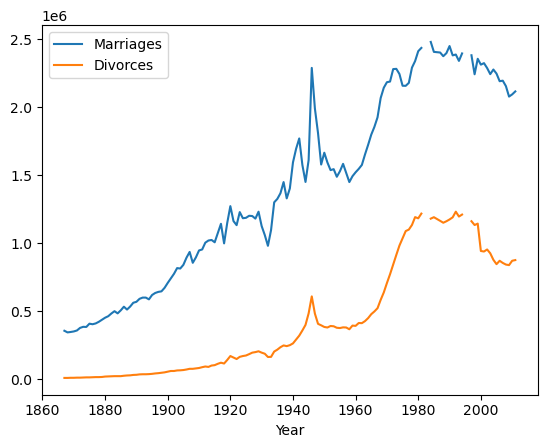

In [99]:
#Creating a line plot
import matplotlib.pyplot as plt
graph = plt.figure(figsize=(10,10))
marriage_divorce.plot('Year',y=['Marriages','Divorces'])
plt.show()

Question 7

C:\Users\rshnt\AppData\Local\Temp\ipykernel_15492\2249914659.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  marriage_divorce2 = marriage_divorce1[marriage_divorce['Year']<=2000]


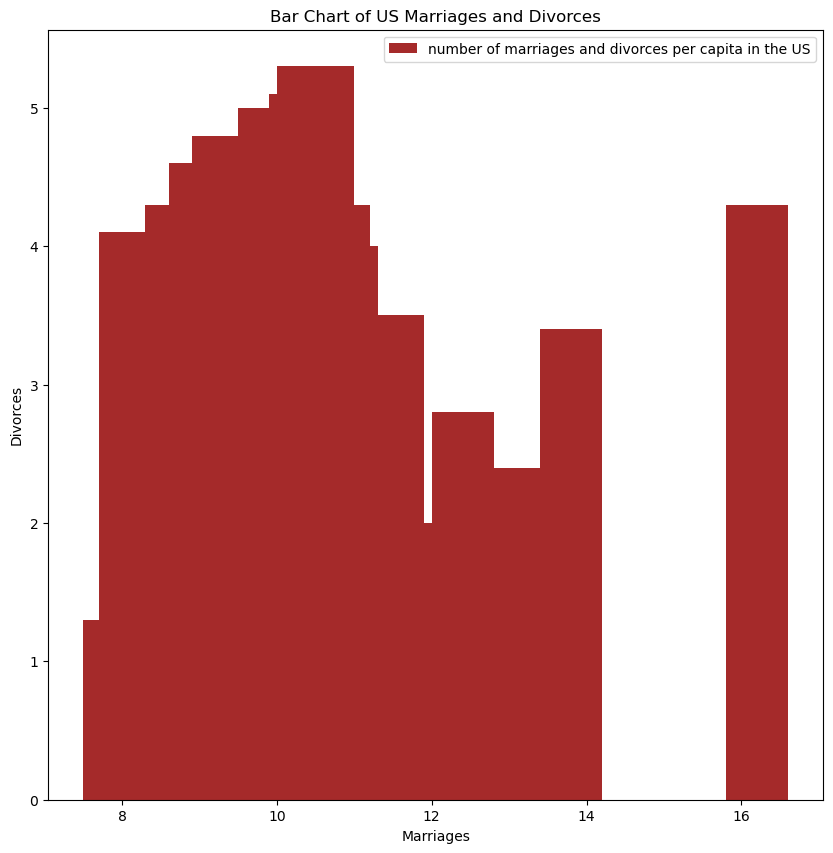

In [101]:
#Creating a vertical bar chart
import matplotlib.pyplot as plt
marriage_divorce1 = marriage_divorce[marriage_divorce['Year']>=1900]
marriage_divorce2 = marriage_divorce1[marriage_divorce['Year']<=2000]
marriage_divorce2.head()

graph=plt.figure(figsize=(10,10))
plt.bar(marriage_divorce2['Marriages_per_1000'],marriage_divorce2['Divorces_per_1000'],label = "number of marriages and divorces per capita in the US",color="brown")

plt.legend()
plt.title('Vertical Bar Chart of US Marriages and Divorces')
plt.xlabel('Marriages')
plt.ylabel('Divorces')

plt.show()
                                                         


Question 8

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
kill_counts = pd.read_csv(r'C:\Users\rshnt\OneDrive\Desktop\BDAT\Data Programming\Assignments\Problem Set 3\actor_kill_counts.csv')
kill_counts.head()

,Actor,Count
0,Arnold Schwarzenegger,369
1,Chow Yun-Fat,295
2,Clint Eastwood,207
3,Clive Owen,194
4,Dolph Lundgren,239


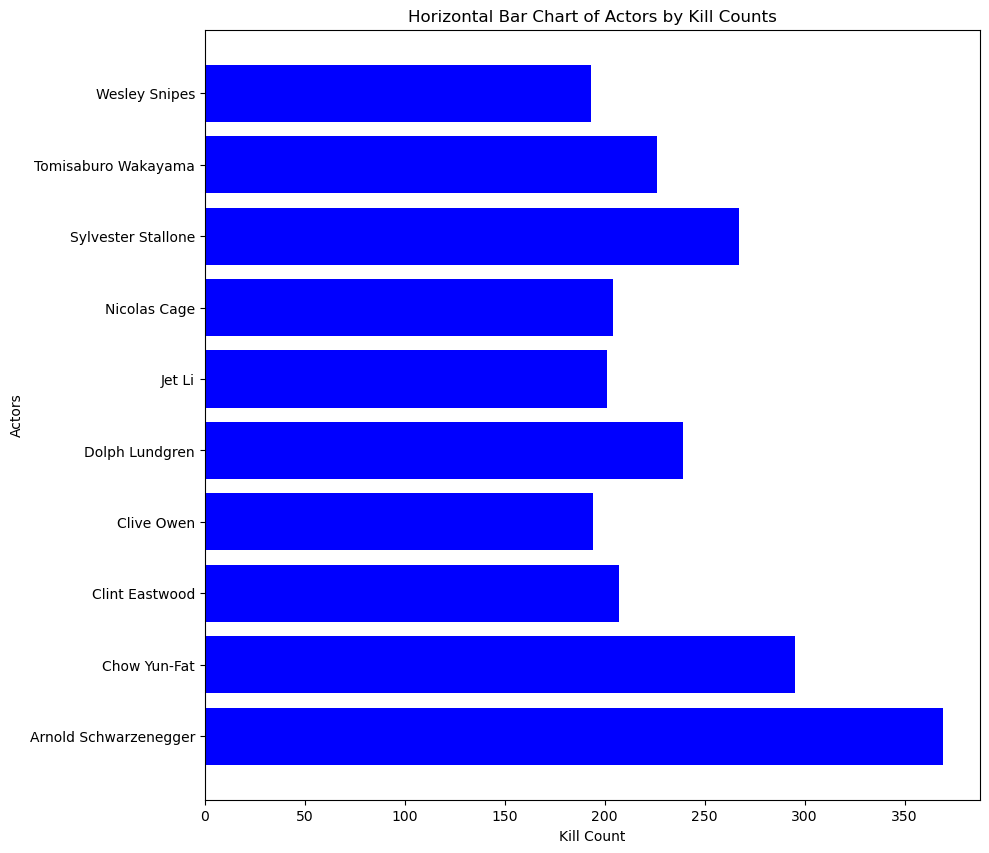

In [104]:
#Creating a horizontal bar chart
horizontal_bar_chart = plt.figure(figsize=(10,10))
plt.barh(kill_counts['Actor'],kill_counts['Count'],color="blue")
plt.title("Horizontal Bar Chart of Actors by Kill Counts")
plt.xlabel("Kill Count")
plt.ylabel("Actors")
plt.show()

Question 9

In [105]:
import pandas as pd
import matplotlib.pyplot as plt
roman_emperors = pd.read_csv(r'C:\Users\rshnt\OneDrive\Desktop\BDAT\Data Programming\Assignments\Problem Set 3\roman-emperor-reigns.csv')
roman_emperors.head()

,Emperor,Length_of_Reign,Cause_of_Death
0,Augustus,40.58,Possibly assassinated
1,Tiberius,22.50,Possibly assassinated
2,Caligula,4.83,Assassinated
3,Claudius,13.75,Possibly assassinated
4,Nero,13.67,Suicide


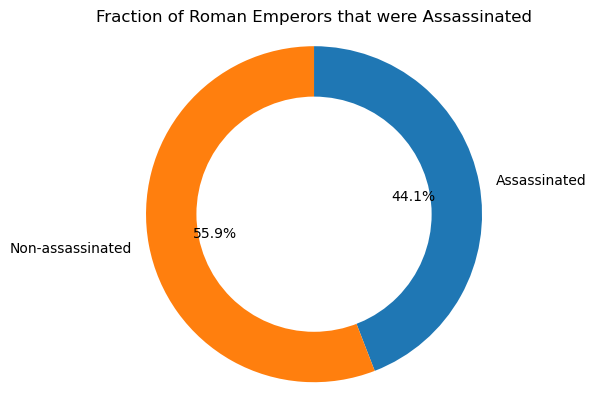

In [121]:
#Creating a pie chart
assassinated_emperors = roman_emperors[
    roman_emperors['Cause_of_Death'].apply(lambda x: 'assassinated' in x.lower())]

number_assassinated = len(assassinated_emperors)
other_deaths = len(roman_emperors) - number_assassinated

labels = ['Assassinated', 'Non-assassinated']
sizes = [number_assassinated, other_deaths]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, counterclock=False, wedgeprops=dict(width=0.4))

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax.axis('equal')  

plt.title('Fraction of Roman Emperors that were Assassinated')
plt.show()


Question 10

In [108]:
import pandas as pd
import matplotlib.pyplot as plt
revenue = pd.read_csv(r'C:\Users\rshnt\OneDrive\Desktop\BDAT\Data Programming\Assignments\Problem Set 3\arcade-revenue-vs-cs-doctorates.csv')
revenue.head()

,Year,Total Arcade Revenue (billions),Computer Science Doctorates Awarded (US)
0,2000,1.196,861
1,2001,1.176,830
2,2002,1.269,809
3,2003,1.240,867
4,2004,1.307,948


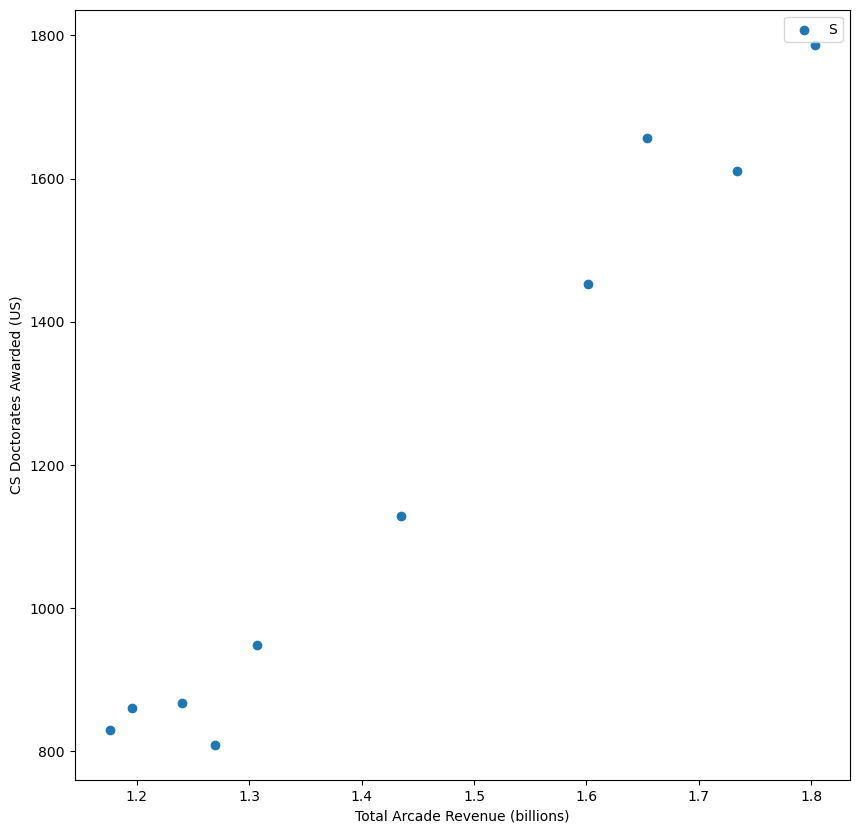

In [112]:
#Creating a scatter plot
groups = revenue.groupby('Year')
arcade_revenue = revenue['Total Arcade Revenue (billions)'].values
cs_doctorates_awards = revenue['Computer Science Doctorates Awarded (US)'].values
scatterPlot = plt.figure(figsize=(10,10))
plt.scatter(arcade_revenue,cs_doctorates_awards)

plt.legend("Scatter Plot")
plt.xlabel("Total Arcade Revenue (billions)")
plt.ylabel("CS Doctorates Awarded (US)")
plt.show()